In [2]:
pip install path

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('crypto_data.csv')

data.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


# Data Preparation

In [124]:
# filter to IsTrading = True and drop column
data2 = data.loc[data["IsTrading"] == True]
trading_data = data2.copy(deep=True).drop(columns="IsTrading")

In [125]:
# check for null values
trading_data.isnull()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1243,False,False,False,False,True,False
1244,False,False,False,False,True,False
1245,False,False,False,False,False,False
1246,False,False,False,False,False,False


In [126]:
# drop null values
trading_data = trading_data.dropna()

In [127]:
# validate
trading_data.isnull()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,False,False,False,False,False,False
2,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
7,False,False,False,False,False,False
...,...,...,...,...,...,...
1238,False,False,False,False,False,False
1242,False,False,False,False,False,False
1245,False,False,False,False,False,False
1246,False,False,False,False,False,False


In [128]:
# filter to coins mined greater than zero
trading_data = trading_data.loc[trading_data["TotalCoinsMined"] > 0]

In [129]:
# drop unnecessary columns
trading_data_to_encode = trading_data.copy(deep=True).drop(columns=["CoinName","Unnamed: 0"])

In [130]:
# check data
trading_data_to_encode.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [131]:
# check data types prior to one-hot encoding
trading_data_to_encode.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [132]:
# convert "Total Coin Supply" to float
trading_data_to_encode["TotalCoinSupply"] = trading_data_to_encode["TotalCoinSupply"].astype(float)

In [133]:
trading_data_to_encode.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [134]:
# check data
trading_data_encoded = pd.get_dummies(trading_data_to_encode)

In [135]:
# scale the data
X = trading_data_encoded
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(532, 98)

# Dimensionality Reduction

In [136]:
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(X_scaled)
print(f"OG Shape: {X_scaled.shape}")
print(f"Dim Reduced Shape: {principal_components.shape}")
print(f"Explained Variance: {pca.explained_variance_.sum()}")
result = tuple(map(lambda i, j: i - j, X_scaled.shape, principal_components.shape))
(rows, features) = result
print(f"Features Removed: {features}")

OG Shape: (532, 98)
Dim Reduced Shape: (532, 74)
Explained Variance: 88.47283457566157
Features Removed: 24


In [137]:
# Reduce dimensions with t-SNE
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

c:\users\jtc\anaconda3\envs\datacoursepython\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\jtc\anaconda3\envs\datacoursepython\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

In [161]:
tsne_features

array([[-12.161445 ,   0.8947885],
       [-12.705572 ,   5.0583935],
       [-17.979033 ,  -1.1348397],
       ...,
       [ 11.999099 , -12.329057 ],
       [ 17.39175  ,   0.3136019],
       [  5.2492867,   6.8308783]], dtype=float32)

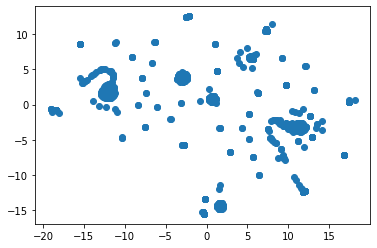

In [138]:
# Plot t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [158]:
inertia = []

K = list(range(1,11))
 
for i in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=i, random_state=1).fit(principal_components)
    kmeanModel.fit(principal_components)
    inertia.append(kmeanModel.inertia_)
    print(kmeanModel.inertia_)
    
print("--------")
print(inertia)

46979.075159676286
45909.8571926749
45135.325174312515
43995.24541077329
43582.680314985635
42451.46487549574
41983.65247530448
40439.82046659655
39136.61099693741
39469.66097708855
--------
[46979.075159676286, 45909.8571926749, 45135.325174312515, 43995.24541077329, 43582.680314985635, 42451.46487549574, 41983.65247530448, 40439.82046659655, 39136.61099693741, 39469.66097708855]


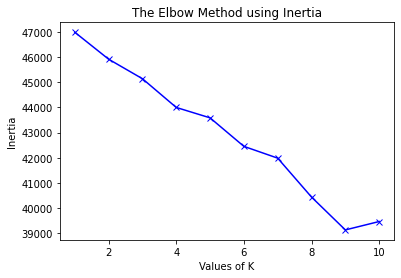

In [159]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Conclusion:

The Elbow plot for Kmeans shows that there are no identifiable clusters in the dataset. 

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion - this does not happen on our plot

The t-SNE plot also suggests this to be true.